<a href="https://colab.research.google.com/github/mohammedirfan78698/AIML-25_B15/blob/main/SET_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = pd.read_csv(url, header=None)

In [4]:
data.columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]

In [5]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [6]:
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [14]:
y_pred = model.predict(X_test_scaled)

In [13]:
cm = confusion_matrix(y_test, y_pred)

In [15]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[70  1]
 [ 2 41]]


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


In [17]:
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

F1-score: 0.9647


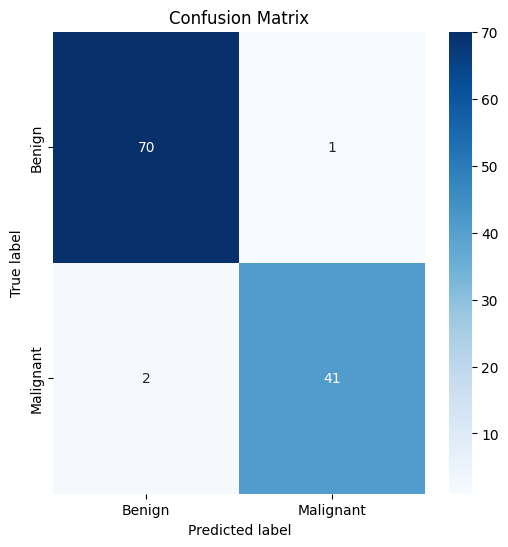

In [18]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

In [20]:
model_2D = LogisticRegression(solver='liblinear')
model_2D.fit(X_train_2D, y_train)

LogisticRegression(solver='liblinear')

In [21]:
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [22]:
Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

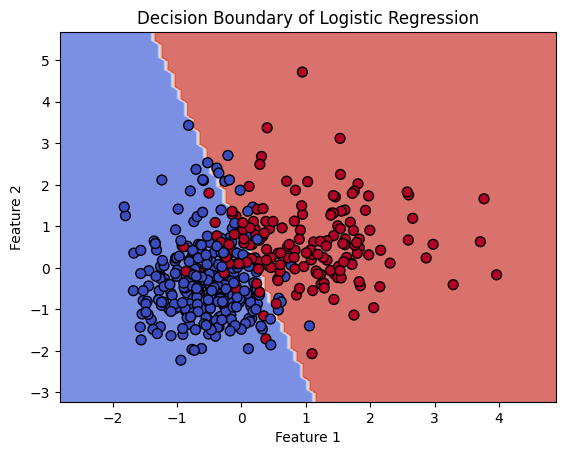

In [23]:
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', marker='o', s=50, cmap='coolwarm')
plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [24]:
model_reg = LogisticRegression(solver='liblinear', C=1.0)

In [25]:
model_reg.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [26]:
y_pred_reg = model_reg.predict(X_test_scaled)

In [27]:
accuracy_reg = accuracy_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)

In [28]:
print(f"Regularized Model Accuracy: {accuracy_reg:.4f}")
print(f"Regularized Model F1-score: {f1_reg:.4f}")


Regularized Model Accuracy: 0.9737
Regularized Model F1-score: 0.9647
